# Iris Dataset Clustering

### Importing Modules

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_palette('hls')
from sklearn.cluster import KMeans

### Loading and Visualizing Data 

In [35]:
df = pd.read_csv('./datasets/Iris.csv', index_col="Id")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
X_df = df.drop('Species', axis=1)

print('X shape: ', X_df.shape)
print('No of Entries', X_df.shape[0])


X shape:  (150, 4)
No of Entries 150


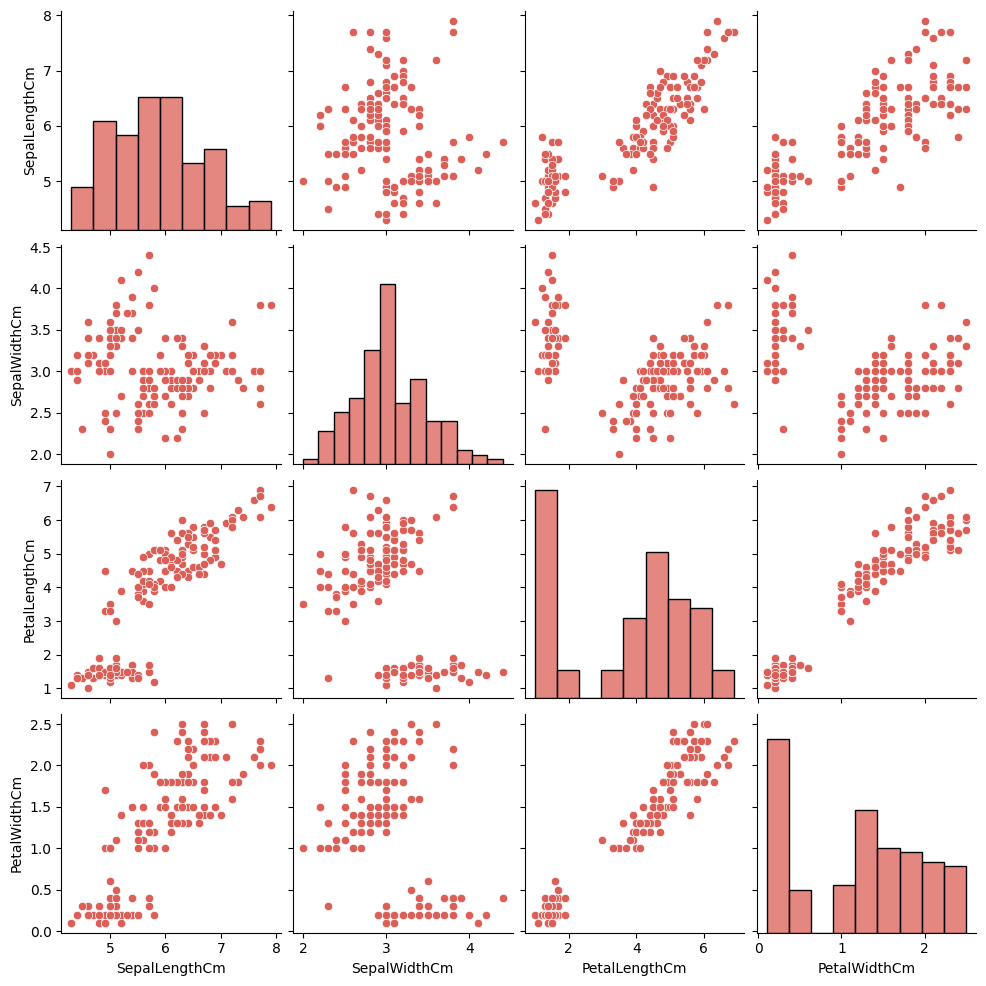

In [43]:
sns.pairplot(data=X_df)
plt.show()

### Training

In [38]:
ex_model = KMeans(n_init = 'auto' ,n_clusters=3)
pred = ex_model.fit_predict(X_df.values)

### Visualizing Clusters Prediction

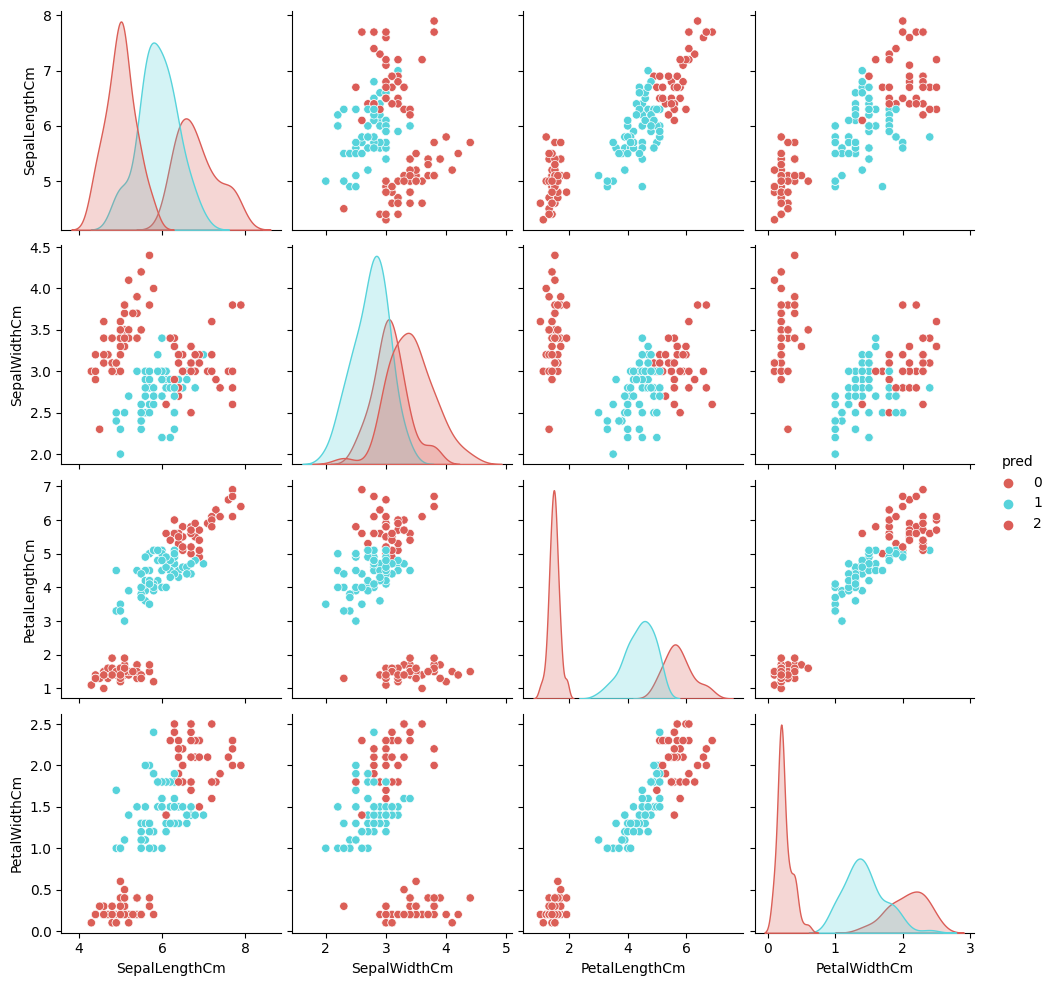

In [41]:
plot_df = X_df.copy(deep = True)
plot_df['pred'] = pred


sns.pairplot(plot_df, hue="pred", palette='hls')

plt.show()

### Finding Optimal Number of Clusters

##### Defining Score Metric 

In [44]:
def distortion_score(X,labels,centroids):
    _, label_codes = np.unique(labels,return_inverse=True)
    return np.linalg.norm((X-centroids[label_codes]),axis=-1).mean()


In [45]:
dist_scores = []
MAX_K = 5
K = range(2, MAX_K+1)
for i in K:
    model = KMeans(n_clusters = i, init='random', n_init='auto')
    model.fit(X_df.values)
    dist = distortion_score(X_df.values, model.labels_, model.cluster_centers_)
    dist_scores.append(dist)


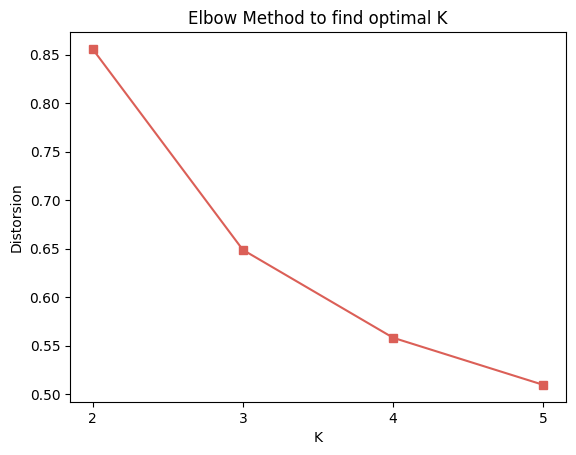

In [46]:
plt.plot(K, dist_scores, marker='s')
plt.xlabel('K')
plt.xticks(K)
plt.ylabel('Distorsion')
plt.title('Elbow Method to find optimal K')
plt.show()

### Conclusion
From the graph figure above, it is known that there are 3 distinct clusters in the data.